In [87]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import scipy.signal
%matplotlib inline

## Some constants

In [88]:
sr = 16000
n_fft = 256
fname = './vctk_processed/232/056_s0010.npy'
chunk = np.load(fname)  # load clean, noisy pair
print(chunk.shape)

(2, 40, 11)


## Show spectrograms of clean / noisy audio

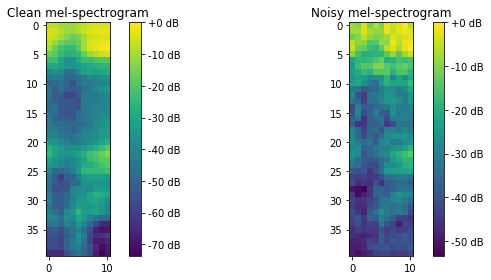

In [89]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(librosa.power_to_db(chunk[0], ref=np.max))
# librosa.display.specshow(librosa.power_to_db(chunk[0], ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Clean mel-spectrogram')
plt.subplot(1, 2, 2)
plt.imshow(librosa.power_to_db(chunk[1], ref=np.max))
plt.colorbar(format='%+2.0f dB')
plt.title('Noisy mel-spectrogram')
plt.tight_layout()

Now lets prepare the mel filter to inverse mel spectrogram.
The process goes like this:
1. prepare mel-filter bank
2. multiply the inverse of mel filter matrix to mel spectrogram to get the original power spectrum
3. istft the power spectrum (TODO: is this right?)

In [90]:
mel_basis = librosa.filters.mel(sr, n_fft, n_mels=40)
print(mel_basis)
print(mel_basis.shape)
print(np.matrix(mel_basis).I.shape)

[[0.         0.0115472  0.00409054 ... 0.         0.         0.        ]
 [0.         0.         0.00950193 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00037974 0.00018987 0.        ]]
(40, 129)
(129, 40)


## Clean audio of the chunk

(129, 11)
[-1.16011317 -1.14531101 -1.09835928 ... 19.07735104 19.94228505
 20.54003659]


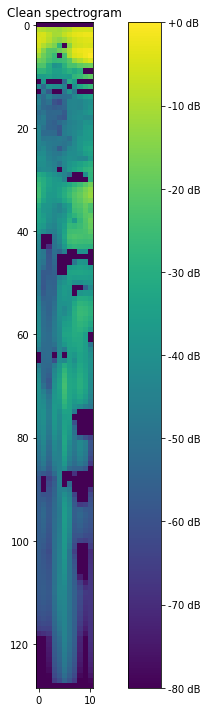

In [91]:
spec = np.dot(np.matrix(mel_basis).I, chunk[0])
print(spec.shape)
_, y = scipy.signal.istft(spec, fs=16000)
print(y)

plt.figure(figsize=(10, 10))
plt.imshow(librosa.power_to_db(spec, ref=np.max))
plt.colorbar(format='%+2.0f dB')
plt.title('Clean spectrogram')
plt.tight_layout()

ipd.Audio(y, rate=16000)

## Noisy audio of the chunk

(129, 11)
[-279.72444361 -264.70416878 -221.3808038  ...   50.5011875    91.71024817
  118.75781809]


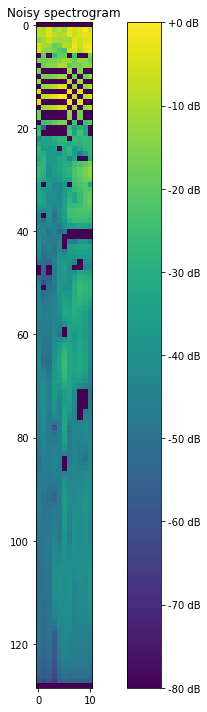

In [84]:
spec = np.dot(np.matrix(mel_basis).I, chunk[1])
print(spec.shape)
_, y = scipy.signal.istft(spec, fs=16000)
print(y)

plt.figure(figsize=(10, 10))
plt.imshow(librosa.power_to_db(spec, ref=np.max))
plt.colorbar(format='%+2.0f dB')
plt.title('Noisy spectrogram')
plt.tight_layout()

ipd.Audio(y, rate=16000)

## Aggregate the chunks to produce the whole audio

[ 0.0001796   0.00018355  0.0001951  ... -0.01890041 -0.01888072
 -0.01886894]


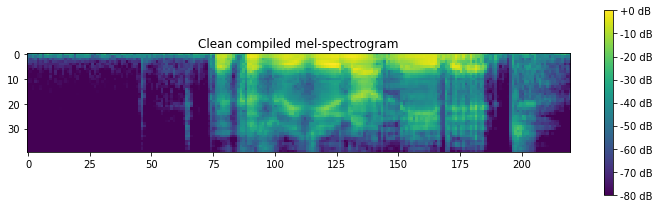

In [120]:
end_index = 20  # total 20 chunks for 056 sample of 232 speaker :)
fname_template = './vctk_processed/232/056_s{:04}.npy'
specs = []
for i in range(end_index):
    audio_name = fname_template.format(i)
    specs.append(np.load(audio_name)[0])
    
# stitch together
compiled = np.hstack(np.asarray(specs))

plt.figure(figsize=(10, 3))
plt.imshow(librosa.power_to_db(compiled, ref=np.max))
# librosa.display.specshow(librosa.power_to_db(chunk[0], ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Clean compiled mel-spectrogram')
plt.tight_layout()

# to stft
compiled_spec = np.dot(np.matrix(mel_basis).I, compiled)
_, ys = scipy.signal.istft(compiled_spec, fs=8000)
print(ys)
ipd.Audio(y, rate=16000)